# Predictive Analysis: Toronto Housing Price Forecast

**Project Type**: Data Science , Machine Learning  
**Author**: Abdumajidhu Semakula  
**eMail**: majid@xiqper.com  
**Date**: March 2, 2025  
**Description**: The goal of this project is to predict housing prices using historical data from Toronto communities. Through out, we shall be performing Data cleaning, feature engineering, and implement regression models (Linear Regression, XGBoost), time series forecasting.



In [45]:
import pandas as pd
import os
import logging

#set up basic logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s:%(message)s')

In [46]:
def load_data(file_path: str) -> pd.DataFrame:
    if not os.path.isfile(file_path):
        logging.error(f"File not found: {file_path}")
        raise FileNotFoundError(f"No such file: {file_path}")
        
    try:
        df= pd.read_csv(file_path)
        logging.info(f"File loaded successfuly with logging {df.shape[0]} rows and {df.shape[1]} columns.")
        return df
    except pd.errors.EmptyDataError:
        logging.error("The CSV file is empty.")
        raise
    except Exception as e:
        logging.exception("Unexpected error occured while loading csv.")
        raise e

In [47]:
csv_file = 'data/gta_housing_pricess_index.csv'
try:
    housing_df = load_data(csv_file)
    display(housing_df.head())
    display(housing_df.describe(include='all'))
except Exception as e:
    print(f"Error loading data: {e}")

INFO:File loaded successfuly with logging 5091 rows and 17 columns.


,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
0,Adjala-Tosorontio,143.7,510000.0,12.00,143.7,510000.0,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-07-01
1,Adjala-Tosorontio,140.8,499700.0,13.82,140.8,499700.0,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-08-01
2,Adjala-Tosorontio,142.7,506400.0,15.83,142.7,506400.0,15.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-01
3,Adjala-Tosorontio,138.4,491100.0,11.08,138.4,491100.0,11.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-01
4,Adjala-Tosorontio,145.4,516000.0,16.51,145.4,516000.0,16.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-11-01


,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
count,5091,5076.000000,5.076000e+03,5076.000000,5076.000000,5.076000e+03,5075.000000,4949.000000,4.949000e+03,4951.000000,3803.000000,3.803000e+03,3804.000000,4010.000000,4.010000e+03,4008.000000,5091
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
top,City of Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01
freq,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
mean,NaN,244.871592,7.720499e+05,10.222695,246.021277,9.481001e+05,9.329878,247.290139,7.182842e+05,9.311238,245.168393,5.829440e+05,9.466312,236.428279,4.838220e+05,11.521093,NaN
std,NaN,41.374120,2.725882e+05,9.186082,41.829704,3.765865e+05,10.411804,43.124667,2.433777e+05,10.105563,55.364090,2.212504e+05,14.473397,52.340839,1.457593e+05,9.079515,NaN
min,NaN,135.000000,2.570000e+05,-19.580000,126.000000,2.591000e+05,-21.320000,137.200000,2.733000e+05,-100.000000,0.000000,0.000000e+00,-100.000000,106.000000,1.714000e+05,-10.600000,NaN
25%,NaN,217.600000,5.890000e+05,4.380000,220.300000,6.822000e+05,2.245000,220.700000,5.429000e+05,2.715000,210.500000,4.394500e+05,4.080000,196.625000,3.819250e+05,5.640000,NaN
50%,NaN,247.100000,7.265000e+05,9.390000,246.700000,8.734500e+05,8.540000,246.700000,6.716000e+05,8.760000,246.400000,5.550000e+05,9.630000,239.600000,4.776000e+05,9.740000,NaN
75%,NaN,270.500000,9.033000e+05,15.382500,272.000000,1.137150e+06,15.715000,269.900000,8.399000e+05,15.370000,278.300000,6.731000e+05,15.602500,272.200000,5.692500e+05,15.290000,NaN


In [48]:
# housing_df.info() #basic structure of our data

#checking for missing values
missing_summary = housing_df.isnull().sum()
display(missing_summary[missing_summary> 0])

#view basic data stats
display(housing_df.describe(include='all'))

CompIndex              15
CompBenchmark          15
CompYoYChange          15
SFDetachIndex          15
SFDetachBenchmark      15
SFDetachYoYChange      16
SFAttachIndex         142
SFAttachBenchmark     142
SFAttachYoYChange     140
THouseIndex          1288
THouseBenchmark      1288
THouseYoYChange      1287
ApartIndex           1081
ApartBenchmark       1081
ApartYoYChange       1083
dtype: int64

,Location,CompIndex,CompBenchmark,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,THouseIndex,THouseBenchmark,THouseYoYChange,ApartIndex,ApartBenchmark,ApartYoYChange,Date
count,5091,5076.000000,5.076000e+03,5076.000000,5076.000000,5.076000e+03,5075.000000,4949.000000,4.949000e+03,4951.000000,3803.000000,3.803000e+03,3804.000000,4010.000000,4.010000e+03,4008.000000,5091
unique,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
top,City of Toronto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-09-01
freq,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
mean,NaN,244.871592,7.720499e+05,10.222695,246.021277,9.481001e+05,9.329878,247.290139,7.182842e+05,9.311238,245.168393,5.829440e+05,9.466312,236.428279,4.838220e+05,11.521093,NaN
std,NaN,41.374120,2.725882e+05,9.186082,41.829704,3.765865e+05,10.411804,43.124667,2.433777e+05,10.105563,55.364090,2.212504e+05,14.473397,52.340839,1.457593e+05,9.079515,NaN
min,NaN,135.000000,2.570000e+05,-19.580000,126.000000,2.591000e+05,-21.320000,137.200000,2.733000e+05,-100.000000,0.000000,0.000000e+00,-100.000000,106.000000,1.714000e+05,-10.600000,NaN
25%,NaN,217.600000,5.890000e+05,4.380000,220.300000,6.822000e+05,2.245000,220.700000,5.429000e+05,2.715000,210.500000,4.394500e+05,4.080000,196.625000,3.819250e+05,5.640000,NaN
50%,NaN,247.100000,7.265000e+05,9.390000,246.700000,8.734500e+05,8.540000,246.700000,6.716000e+05,8.760000,246.400000,5.550000e+05,9.630000,239.600000,4.776000e+05,9.740000,NaN
75%,NaN,270.500000,9.033000e+05,15.382500,272.000000,1.137150e+06,15.715000,269.900000,8.399000e+05,15.370000,278.300000,6.731000e+05,15.602500,272.200000,5.692500e+05,15.290000,NaN


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

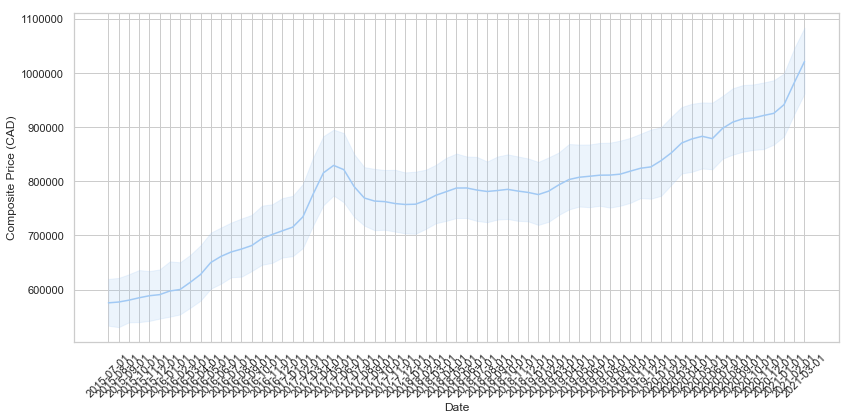

In [50]:
#set seaborn style (option)
sns.set(style='whitegrid', palette='pastel')

#line chart: benchmark price overtime
plt.figure(figsize=(12,6))
sns.lineplot(data=housing_df, x='Date', y='CompBenchmark')
plt.title=("Toronto Composite Benchmark  Over Time")
plt.xlabel("Date")
plt.ylabel("Composite Price (CAD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

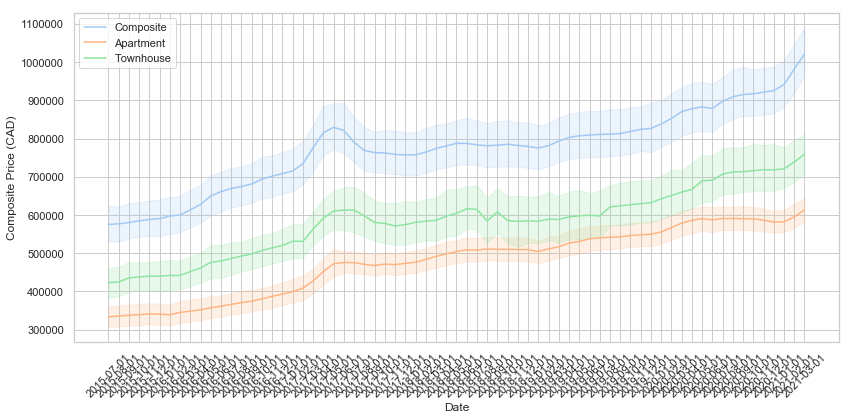

In [51]:
# Comparehome types
plt.figure(figsize=(12,6))
sns.lineplot(data=housing_df, x='Date', y='CompBenchmark', label='Composite')
sns.lineplot(data=housing_df, x='Date', y='ApartBenchmark', label='Apartment')
sns.lineplot(data=housing_df, x='Date', y='THouseBenchmark', label='Townhouse')
plt.title=("Toronto House trends by house type")
plt.xlabel("Date")
plt.ylabel("Composite Price (CAD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [52]:
## Renaming column names for ease of use
housing_df.rename(columns={
    'CompBenchmark': 'Composite',
    'ApartBenchmark': 'Apartment',
    'THouseBenchmark': 'Townhouse',
}, inplace=True)

In [53]:
###Feature Engineering

In [54]:
#Ensure date column is in datetime and format
housing_df['Date'] = pd.to_datetime(housing_df['Date'])

#Extract year and month
housing_df['Year'] = housing_df['Date'].dt.year
housing_df['Month'] = housing_df['Date'].dt.month 

In [55]:
#monthly % change in composite price
housing_df['Composite_pct_change'] = housing_df['Composite'].pct_change()*100

#previous months composite change
housing_df['Composite_prev'] = housing_df['Composite'].shift(1)

#price delta (current - previous)
housing_df['Composite_delta'] = housing_df['Composite'] - housing_df['Composite_prev']


In [56]:
#next months price  = target
housing_df['Target_Next_Month'] = housing_df['Composite'].shift(-1)

In [57]:
#Drop rows with any NaNs created by shift()
housing_df.dropna(inplace=True)
logging.info(f"Data after feature engineering: {housing_df.shape[0]} rows")
display(housing_df.head())

INFO:Data after feature engineering: 3683 rows


,Location,CompIndex,Composite,CompYoYChange,SFDetachIndex,SFDetachBenchmark,SFDetachYoYChange,SFAttachIndex,SFAttachBenchmark,SFAttachYoYChange,...,ApartIndex,Apartment,ApartYoYChange,Date,Year,Month,Composite_pct_change,Composite_prev,Composite_delta,Target_Next_Month
69,Ajax,179.8,444300.0,16.00,178.8,478900.0,17.86,187.1,402400.0,15.64,...,148.7,252500.0,5.61,2015-07-01,2015,7,-54.584483,978300.0,-534000.0,445800.0
70,Ajax,180.4,445800.0,16.31,179.2,480000.0,15.76,187.6,403500.0,16.81,...,151.5,257200.0,8.99,2015-08-01,2015,8,0.337610,444300.0,1500.0,451700.0
71,Ajax,182.8,451700.0,15.55,181.4,485800.0,15.10,190.1,408800.0,15.99,...,154.3,262000.0,10.53,2015-09-01,2015,9,1.323463,445800.0,5900.0,454200.0
72,Ajax,183.8,454200.0,15.74,182.3,488300.0,14.51,191.2,411200.0,15.95,...,152.4,258800.0,8.70,2015-10-01,2015,10,0.553465,451700.0,2500.0,450000.0
73,Ajax,182.1,450000.0,12.69,180.3,482900.0,11.99,190.3,409300.0,13.14,...,151.2,256700.0,5.00,2015-11-01,2015,11,-0.924703,454200.0,-4200.0,450700.0


In [58]:
#Building models
#Define input features x and target y
feature_cols = ['Composite', 'Year', 'Month', 'Composite_pct_change', 'Composite_prev', 'Composite_delta']
target_col = ['Target_Next_Month']
X = housing_df[feature_cols]
y = housing_df[target_col]

In [59]:
#split data into train/ test sets
from sklearn.model_selection import train_test_split

#use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,
random_state=42, shuffle=False
#preserve time order
)

In [61]:
#train multiple models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [62]:
#initialise models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)

#fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

logging.info("Models trained successfully")

C:\Users\Majid\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
INFO:Models trained successfully


In [63]:
#evaluate models
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate(model, name):
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"{name}:\n RMSE = {rmse:.2f}, RR = {r2:.4f}\n")
    return preds

lr_preds = evaluate(lr_model, "Linear Regression")
rf_preds = evaluate(rf_model, "Random Forest")
xgb_preds = evaluate(xgb_model, "XGBoost")

Linear Regression:
 RMSE = 57840.50, RR = 0.8990

Random Forest:
 RMSE = 37130.19, RR = 0.9584

XGBoost:
 RMSE = 28816.55, RR = 0.9749



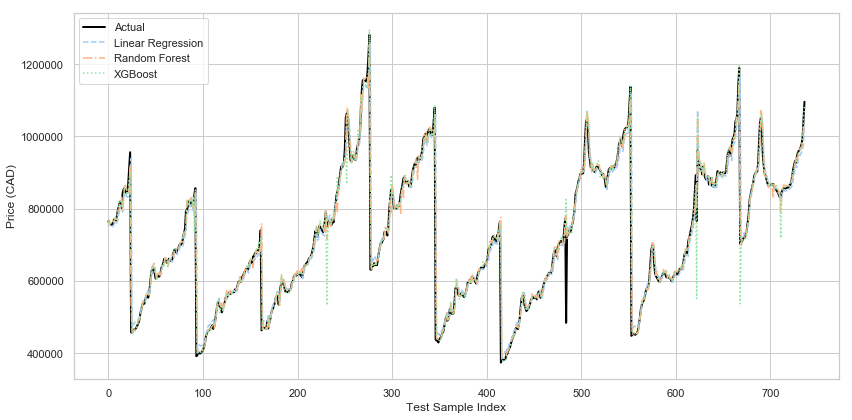

In [64]:
#Visualise predictions vs actuals
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label = "Actual", color='black', linewidth=2)
plt.plot(lr_preds, label = "Linear Regression", linestyle='--')
plt.plot(rf_preds, label = "Random Forest", linestyle='-.')
plt.plot(xgb_preds, label = "XGBoost", linestyle=':')
plt.title=("Actual vs Predicted Composite Prices")
plt.xlabel("Test Sample Index")
plt.ylabel("Price (CAD)")
plt.legend()
plt.tight_layout()
plt.show()